Student Score prediction

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = "http://bit.ly/w-data"
stu_data= pd.read_csv(url)

In [ ]:
stu_data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [ ]:
stu_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
stu_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


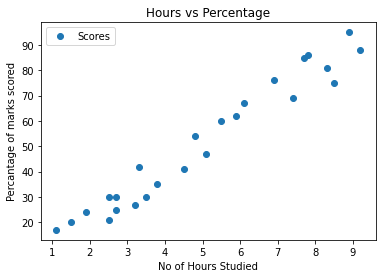

In [ ]:
# Plotting the distribution of scores
stu_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percantage of marks scored')  
plt.show()

In [ ]:
x = stu_data.iloc[:, :-1].values  
y = stu_data.iloc[:, 1].values  
print(stu_data.shape)
print(x.shape)
print(y.shape)

(25, 2)
(25, 1)
(25,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

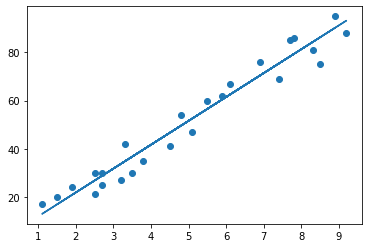

In [ ]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [ ]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
y_pred=regressor.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
dataset=pd.DataFrame({'Actual values': y_test, 'Predicted values':y_pred})
dataset

,Actual values,Predicted values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# You can also test with your own data
hours = [9.25]
pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9454906892105354

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
